### Modeling

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f'📊 {model_name} Performance:')
    print(f'MSE: {mse:.2f}')
    print(f'RMSE: {rmse:.2f}')
    print(f'MAE: {mae:.2f}')
    print(f'R²: {r2:.4f}')
    print('-' * 30)
    
    return mse, rmse, mae, r2

# Model with Numerical Scaled Data:

In [29]:
data_ready_scaled = pd.read_csv('data/data_features_ready_scaled.csv')
data_ready_scaled.head()

,host_id,latitude,longitude,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,tempo_desde_ultimo_review,nome_tfidf_mean,...,min_nights_category,bairro_group_Bronx,bairro_group_Brooklyn,bairro_group_Manhattan,bairro_group_Queens,bairro_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,price
0,-0.860173,0.452411,-0.684642,-0.570973,0.609452,-0.450550,-0.156104,1.840364,-0.678397,-1.555497,...,-1.017988,-0.151072,-0.835607,1.121266,-0.362039,-0.087678,0.961394,-0.916660,-0.155889,225
1,-0.860151,1.468387,0.222486,-0.340411,-0.582386,-0.691704,-0.186450,1.916342,1.865497,0.497060,...,-0.160430,-0.151072,-0.835607,1.121266,-0.362039,-0.087678,-1.040156,1.090917,-0.155889,150
2,-0.860148,-0.803438,-0.164457,-0.570973,3.973083,2.252910,-0.186450,0.617121,-0.716850,-0.120119,...,-1.017988,-0.151072,1.196735,-0.891849,-0.362039,-0.087678,0.961394,-0.916660,-0.155889,89
3,-0.860118,1.275645,0.177205,0.466557,-0.344018,-0.628243,-0.186450,-0.856849,-0.522020,1.476006,...,0.697127,-0.151072,-0.835607,1.121266,-0.362039,-0.087678,0.961394,-0.916660,-0.155889,80
4,-0.860116,0.343295,-0.494637,-0.340411,1.377525,-0.317281,-0.186450,0.123265,-0.705741,0.896101,...,-0.160430,-0.151072,-0.835607,1.121266,-0.362039,-0.087678,0.961394,-0.916660,-0.155889,200


In [30]:
data_ready_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 47 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   host_id                        48894 non-null  float64
 1   latitude                       48894 non-null  float64
 2   longitude                      48894 non-null  float64
 3   minimo_noites                  48894 non-null  float64
 4   numero_de_reviews              48894 non-null  float64
 5   reviews_por_mes                48894 non-null  float64
 6   calculado_host_listings_count  48894 non-null  float64
 7   disponibilidade_365            48894 non-null  float64
 8   tempo_desde_ultimo_review      48894 non-null  float64
 9   nome_tfidf_mean                48894 non-null  float64
 10  w2v_pca_1                      48894 non-null  float64
 11  w2v_pca_2                      48894 non-null  float64
 12  w2v_pca_3                      48894 non-null 

In [32]:
features_to_keep = ["latitude", "longitude", "minimo_noites", "numero_de_reviews", "reviews_por_mes", 
                    "calculado_host_listings_count", "disponibilidade_365", "tempo_desde_ultimo_review", "nome_sentiment",
                    "dist_manhattan_center", "dist_central_park", "dist_wall_street", "dist_statue_of_liberty", "dist_jfk_airport", "dist_la_guardia_airport", "dist_ubs_arena", "dist_coney_island_beach", 
                    "preco_medio_bairro", "min_nights_category", 
                    "room_type_Entire home/apt", "room_type_Private room","room_type_Shared room"
                    ]

X = data_ready_scaled[features_to_keep]  # Features
y = data_ready_scaled['price']  # Target

In [5]:
X = data_ready_scaled.drop(columns=['price'])  # Features
y = data_ready_scaled['price']  # Target

### First Training using Different Models:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando os modelos
models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "CatBoost": CatBoostRegressor(n_estimators=100, learning_rate=0.1, verbose=0, random_state=42)
}

# Dicionário para armazenar os resultados
results = {}

# Treinamento e avaliação
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)  # Treina o modelo
    
    # Predição
    y_pred = model.predict(X_test)
    
    # Cálculo das métricas
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Armazena os resultados
    results[name] = {"MSE": mse, "RMSE": rmse, "MAE": mae, "R²": r2}

# Exibir os resultados
import pandas as pd
df_results = pd.DataFrame(results).T
df_results.head(10)

Training LinearRegression...
Training RandomForest...
Training XGBoost...
Training LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011036 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3983
[LightGBM] [Info] Number of data points in the train set: 39115, number of used features: 22
[LightGBM] [Info] Start training from score 140.824262
Training CatBoost...


,MSE,RMSE,MAE,R²
LinearRegression,6142.849109,78.376330,50.878789,0.428297
RandomForest,5536.320150,74.406452,46.594345,0.484746
XGBoost,5304.429165,72.831512,45.288343,0.506328
LightGBM,5309.165211,72.864019,45.337695,0.505887
CatBoost,5457.879284,73.877461,46.057367,0.492046


# Hyperparameter Tunning

## XGBoost

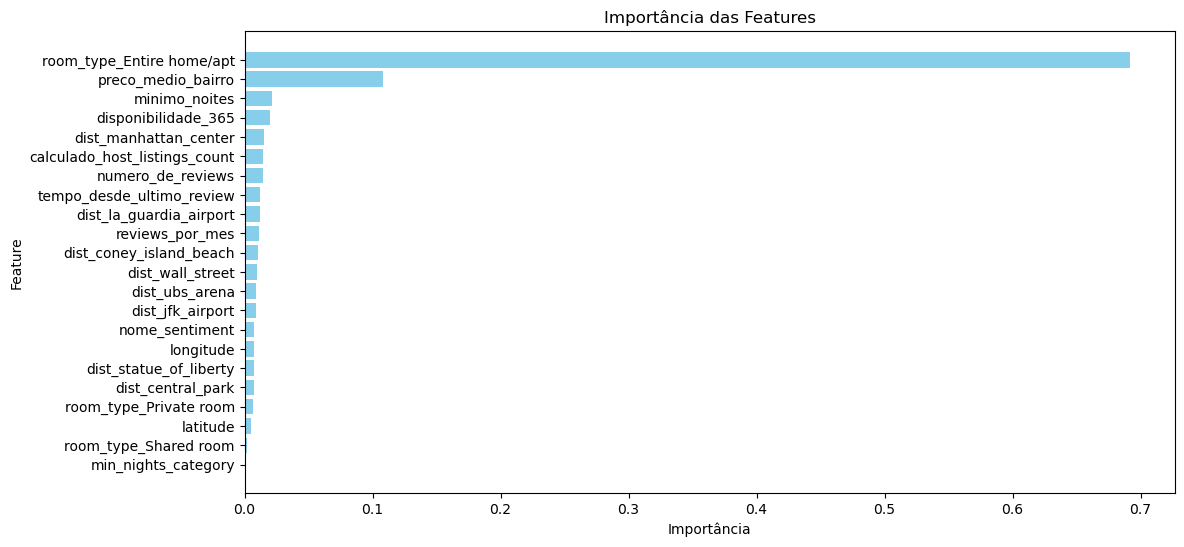

📊 CatBoost Performance:
MSE: 5304.43
RMSE: 72.83
MAE: 45.29
R²: 0.5063
------------------------------


c:\Users\danrl\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [39]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

nome_do_experimento = "Price_Prediction_Housing"

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando os modelos
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

feature_importance = model.feature_importances_

# Criar um DataFrame para visualização
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plotar a importância das features
plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.title('Importância das Features')
plt.gca().invert_yaxis()
plt.show()

# Fazer previsões
y_pred = model.predict(X_test)

# Calcular métricas de avaliação
mse, rmse, mae, r2 = evaluate_model(y_test, y_pred, "CatBoost")

## LGBMRegressor

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003762 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3983
[LightGBM] [Info] Number of data points in the train set: 39115, number of used features: 22
[LightGBM] [Info] Start training from score 140.824262


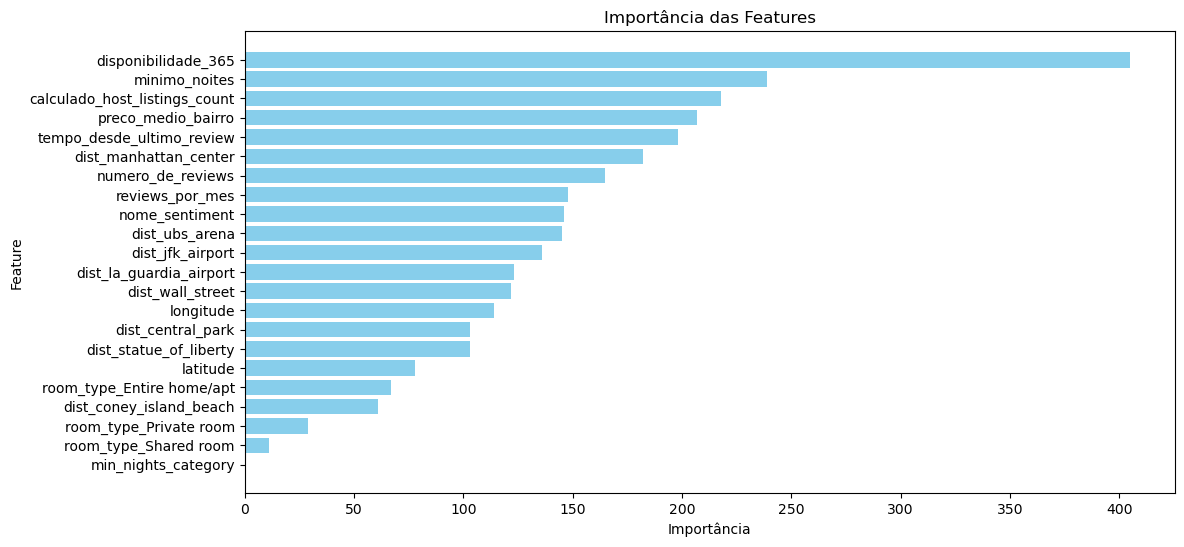

📊 CatBoost Performance:
MSE: 5309.17
RMSE: 72.86
MAE: 45.34
R²: 0.5059
------------------------------


c:\Users\danrl\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [42]:
from lightgbm import LGBMRegressor

nome_do_experimento = "Price_Prediction_Housing"

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando os modelos
model = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

feature_importance = model.feature_importances_

# Criar um DataFrame para visualização
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plotar a importância das features
plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.title('Importância das Features')
plt.gca().invert_yaxis()
plt.show()

# Fazer previsões
y_pred = model.predict(X_test)

# Calcular métricas de avaliação
mse, rmse, mae, r2 = evaluate_model(y_test, y_pred, "CatBoost")

## LGBMRegressor - GridSearchCV

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Definição do experimento
nome_do_experimento = "Price_Prediction_Housing"

# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir a grade de hiperparâmetros para o tuning
param_grid = {
    'n_estimators': [100, 500, 1000],  # Número de árvores
    'learning_rate': [0.01, 0.05, 0.1],  # Taxa de aprendizado
    'max_depth': [-1, 5, 10],  # Profundidade máxima da árvore (-1 para ilimitado)
    'num_leaves': [31, 50, 100],  # Número máximo de folhas em cada árvore
    'subsample': [0.8, 1.0],  # Fração de amostras para treinamento
    'colsample_bytree': [0.8, 1.0],  # Fração de colunas usadas para cada árvore
    'reg_alpha': [0, 0.1, 1],  # Regularização L1
    'reg_lambda': [0, 0.1, 1]  # Regularização L2
}

# Criar o modelo
model = LGBMRegressor(random_state=42)

# Aplicar GridSearchCV para buscar os melhores parâmetros
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Melhor modelo encontrado
best_model = grid_search.best_estimator_

# Treinar o modelo otimizado
best_model.fit(X_train, y_train)

# Obter a importância das features
feature_importance = best_model.feature_importances_

# Criar um DataFrame para visualização
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plotar a importância das features
plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.title('Importância das Features')
plt.gca().invert_yaxis()
plt.show()

# Fazer previsões
y_pred = best_model.predict(X_test)

# Calcular métricas de avaliação
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Exibir os resultados
print(f"Melhores parâmetros: {grid_search.best_params_}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")


Fitting 5 folds for each of 2916 candidates, totalling 14580 fits


## CatBoost with Scaled Numerical Features:

### Hyperparameter Tunning : RandomizedSearchCV

Alguns hiperparâmetros que impactam diretamente o desempenho:

- iterations → Número de árvores no modelo (padrão: 1000).
- learning_rate → Taxa de aprendizado (padrão: 0.03).
- depth → Profundidade das árvores (padrão: 6).
- l2_leaf_reg → Regularização L2 para evitar overfitting.
- subsample → Proporção de amostras usadas para cada árvore (padrão: 1.0).
- colsample_bylevel → Número de features usadas por nível na árvore.

In [ ]:
help(CatBoostRegressor())

In [7]:
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV

# Definição do modelo base
cat_model = CatBoostRegressor(verbose=0, random_state=42)

# Grid de hiperparâmetros
param_grid = {
    'iterations': [1000, 2000],  # Número de árvores
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Taxa de aprendizado
    'depth': [4, 6, 8, 10],  # Profundidade da árvore
    'l2_leaf_reg': [1, 3, 5],  # Regularização L2
    'subsample': [0.6, 0.8, 1.0],  # Proporção de amostras por árvore
    'colsample_bylevel': [0.6, 0.8]  # Número de features por nível
}

# RandomizedSearchCV para encontrar os melhores parâmetros
cat_tuned = RandomizedSearchCV(
    estimator=cat_model,
    param_distributions=param_grid,
    n_iter=20,  # Número de combinações testadas
    scoring='neg_mean_squared_error',  # Critério de avaliação
    cv=5,  # Validação cruzada
    n_jobs=-1,
    verbose=1
)

# Treinando o modelo com os hiperparâmetros otimizados
cat_tuned.fit(X_train, y_train)

# Melhor combinação encontrada
print("Melhores hiperparâmetros:", cat_tuned.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Melhores hiperparâmetros: {'subsample': 0.8, 'learning_rate': 0.01, 'l2_leaf_reg': 1, 'iterations': 2000, 'depth': 10, 'colsample_bylevel': 0.6}


#### Best Estimator Model Validation:

In [ ]:
# Previsões no conjunto de teste
y_pred_tuned = cat_tuned.best_estimator_.predict(X_test)

# If you want to use this model to make predictions, you can save it using the following code:
model = cat_tuned.best_estimator_

# Avaliação do modelo otimizado
mse, rmse, mae, r2 = evaluate_model(y_test, y_pred_tuned, "CatBoost Tunado")

### Experiments | MLFlow & Model Save | Run, Registry and Save

In [ ]:
'''
Best Parametrs for catboost according to RandomizedSearchCV:
{'subsample': 0.8,
'learning_rate': 0.01,
'l2_leaf_reg': 1,
'iterations': 2000,
'depth': 10,
'colsample_bylevel': 0.6
}
'''

#### Create the Model and Validate

In [ ]:
from catboost import CatBoostRegressor

# Definir os hiperparâmetros do modelo CatBoost
params = {
    'subsample': 0.8,
    'learning_rate': 0.01,
    'l2_leaf_reg': 1,
    'iterations': 2000,
    'depth': 10,
    'colsample_bylevel': 0.6
}

# Criar e treinar o modelo
model = CatBoostRegressor(**params, verbose=0)
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Calcular métricas de avaliação
mse, rmse, mae, r2 = evaluate_model(y_test, y_pred, "CatBoost")

📊 CatBoost Performance:
MSE: 43369.26
RMSE: 208.25
MAE: 60.59
R²: 0.1310
------------------------------


c:\Users\danrl\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [103]:
# Exibir as primeiras previsões
print(y_pred[:5])

[ 93.4671097  105.63714845  62.06740049 221.08214034  89.04831552]


#### Feature Importance Analysis:

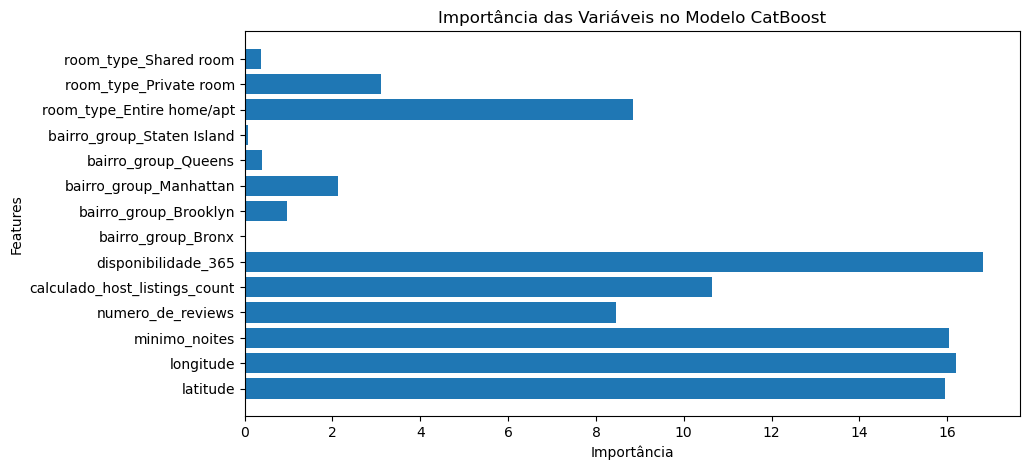

In [91]:
import matplotlib.pyplot as plt

# Pegando a importância das features do modelo treinado
feature_importance = model.get_feature_importance()
features = X_train.columns

# Criar um DataFrame para salvar no MLflow
df_importance = pd.DataFrame({'Feature': features, 'Importance': feature_importance})

# Criando um gráfico
plt.figure(figsize=(10, 5))
plt.barh(features, feature_importance)
plt.xlabel("Importância")
plt.ylabel("Features")
plt.title("Importância das Variáveis no Modelo CatBoost")
plt.show()

#### Save the Model & Feature Importance:

In [92]:
import joblib
from datetime import datetime

# Get the current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the model to a file with the timestamp
model_file_name = f'models/catboost_model_{timestamp}.pkl'
joblib.dump(model, model_file_name)

#Save the feature importance to a file with the timestamp
feature_file_name = f'feature_importance/feature_importance{timestamp}.csv'
df_importance.to_csv(feature_file_name, index=False)

print(f"Model saved successfully as {model_file_name}!")

Model saved successfully as models/catboost_model_20250204_172540.pkl!


#### Load the model

In [95]:
# Load the Model
import joblib

model_path = 'models/best_catboost_model.pkl'

# Load the model from the file
model = joblib.load(model_path)

# Verify the model is loaded correctly
print(model)

### SHAP Analysis

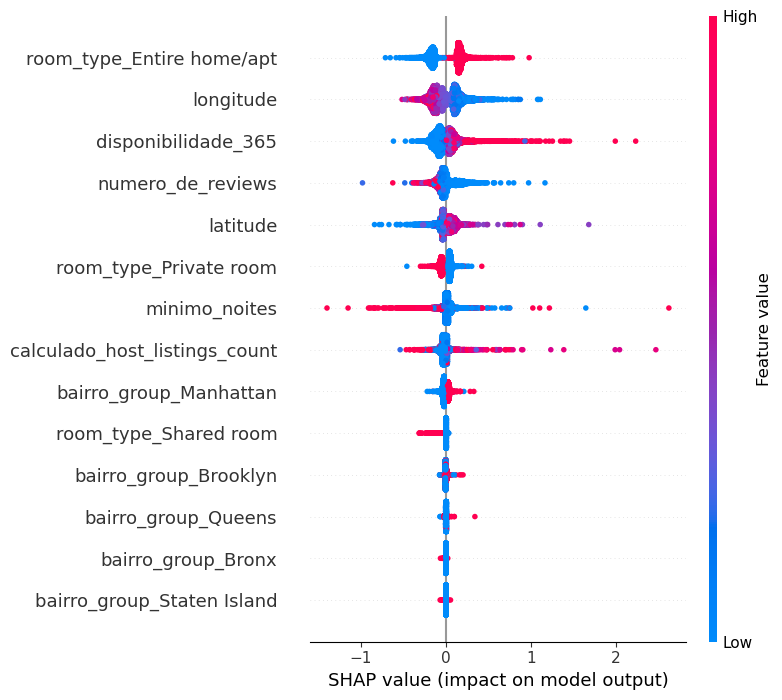

<Figure size 640x480 with 0 Axes>

In [62]:
import shap
shap.initjs()

# Criar explicador SHAP
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# Gerar e salvar gráfico SHAP
shap.summary_plot(shap_values, X_test)
plt.savefig("shap_analysis/shap_summary.png")

#### Como interpretar?
- As features são ordenadas pela importância → quanto mais alta no gráfico, mais impacto tem na previsão.
- Cada ponto representa um dado de teste, e sua cor indica o valor da variável:
- Vermelho = valores altos
- Azul = valores baixos

- Se os pontos vermelhos estiverem à direita, significa que valores altos dessa feature aumentam o preço previsto.
- Se os pontos vermelhos estiverem à esquerda, significa que valores altos dessa feature diminuem o preço previsto.

### Question:
#### O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?

In [ ]:
help(shap.dependence_plot)

In [46]:
# Verifique as primeiras linhas dos shap_values para garantir que estão corretos
print(shap_values.shape)  # Deve ser (n_samples, n_features)

# Verifique a presença da variável que você deseja analisar em X_test
print(X_test.columns)  # Certifique-se de que 'disponibilidade_365' está presente

(9779, 14)
Index(['latitude', 'longitude', 'minimo_noites', 'numero_de_reviews',
       'calculado_host_listings_count', 'disponibilidade_365',
       'bairro_group_Bronx', 'bairro_group_Brooklyn', 'bairro_group_Manhattan',
       'bairro_group_Queens', 'bairro_group_Staten Island',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room'],
      dtype='object')


In [54]:
# Incluindo a opção de interação automática
#shap.dependence_plot("disponibilidade_365", shap_values[0], X_test, interaction_index=None)

In [26]:
import pandas as pd

# Criando um DataFrame com as features e o target
df_corr = pd.DataFrame(X_train, columns=['minimo_noites', 'disponibilidade_365'])
df_corr['price'] = y_train

# Calculando a correlação de Pearson
correlation = df_corr.corr()
print(correlation['price'])

minimo_noites          0.040419
disponibilidade_365    0.084189
price                  1.000000
Name: price, dtype: float64


### Other Analysis

In [ ]:
import seaborn as sns

# Calcular erros residuais
residuals = y_test - y_pred

# Criar o gráfico
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Erro Residual")
plt.ylabel("Frequência")
plt.title("Distribuição dos Erros do Modelo")

# Salvar a imagem
plt.savefig("analysis/residual_distribution.png")

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")
plt.xlabel("Valores Reais")
plt.ylabel("Previsões")
plt.title("Previsões vs. Valores Reais")

# Salvar a imagem
plt.savefig("analysis/predictions_vs_actuals.png")

# CatBoost With Categorical Features:

In [4]:
data_ready = pd.read_csv('data/data_features_ready.csv')
data_ready.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,minimo_noites,...,min_nights_category,bairro_group_Bronx,bairro_group_Brooklyn,bairro_group_Manhattan,bairro_group_Queens,bairro_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,price
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,1,...,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,225
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,3,...,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,150
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,1,...,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,89
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,10,...,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,80
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,3,...,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,200


In [70]:
data_ready.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48894 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48894 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   minimo_noites                  48894 non-null  int64  
 10  numero_de_reviews              48894 non-null  int64  
 11  ultima_review                  38842 non-null  object 
 12  reviews_por_mes                48894 non-null 

In [5]:
#1 features_to_keep = ["bairro_group", "bairro",  "room_type", "minimo_noites", "numero_de_reviews", "calculado_host_listings_count", "disponibilidade_365"]
#2 features_to_keep = ["latitude", "longitude", "bairro_group", "bairro",  "room_type", "minimo_noites", "numero_de_reviews", "reviews_por_mes", "calculado_host_listings_count", "disponibilidade_365", "dist_manhattan_center"]
#3 features_to_keep = ["latitude", "longitude", "bairro_group", "bairro",  "room_type", "minimo_noites", "numero_de_reviews", "reviews_por_mes", "calculado_host_listings_count", "disponibilidade_365", "location_cluster", "dist_manhattan_center", "h3_numeric", "preco_medio_bairro", "Entire home/apt", "Private room", "Shared room", "min_nights_category", "ultima_review_ano"]
#4* features_to_keep = ["latitude", "longitude", "bairro_group", "bairro",  "room_type", "minimo_noites", "numero_de_reviews", "reviews_por_mes", "calculado_host_listings_count", "disponibilidade_365", "dist_manhattan_center", "preco_medio_bairro", "Entire home/apt", "Private room", "Shared room", "min_nights_category", "ultima_review_ano"]
#5 features_to_keep = ["latitude", "longitude", "bairro_group", "bairro",  "room_type", "minimo_noites", "numero_de_reviews", "reviews_por_mes", "calculado_host_listings_count", "disponibilidade_365", "dist_manhattan_center", "preco_medio_bairro", "min_nights_category", "ultima_review_ano"]
#6 features_to_keep = ["latitude", "longitude", "bairro",  "room_type", "minimo_noites", "numero_de_reviews", "reviews_por_mes", "calculado_host_listings_count", "disponibilidade_365", "dist_manhattan_center", "preco_medio_bairro", "min_nights_category", "ultima_review_ano"]
#7* features_to_keep = ["latitude", "longitude", "bairro",  "room_type", "minimo_noites", "numero_de_reviews", "reviews_por_mes", "calculado_host_listings_count", "disponibilidade_365", "dist_manhattan_center", "dist_jfk_airport", "preco_medio_bairro", "min_nights_category", "ultima_review_ano"]
#8** features_to_keep = ["latitude", "longitude", "bairro",  "room_type", "minimo_noites", "numero_de_reviews", "reviews_por_mes", "calculado_host_listings_count", "disponibilidade_365", "dist_manhattan_center", "dist_wall_street", "dist_jfk_airport", "dist_yankee_stadium", "preco_medio_bairro", "min_nights_category", "ultima_review_ano"]
#9** -- features_to_keep = ["latitude", "longitude", "bairro",  "room_type", "minimo_noites", "numero_de_reviews", "reviews_por_mes", "calculado_host_listings_count", "disponibilidade_365", "dist_manhattan_center", "dist_central_park", "dist_wall_street", "dist_statue_of_liberty", "dist_jfk_airport", "dist_la_guardia_airport", "dist_yankee_stadium", "dist_staten_island_greenbelt", "dist_ubs_arena", "dist_coney_island_beach", "dist_bronx_zoo", "preco_medio_bairro", "min_nights_category", "ultima_review_ano"]

#10 
features_to_keep = ["latitude", "longitude", "bairro",  "room_type", "minimo_noites", "numero_de_reviews", "reviews_por_mes", "calculado_host_listings_count", "disponibilidade_365", "tempo_desde_ultimo_review", "trimestre_review", "nome_sentiment","dist_manhattan_center", "dist_central_park", "dist_wall_street", "dist_statue_of_liberty", "dist_jfk_airport", "dist_la_guardia_airport", "dist_ubs_arena", "dist_coney_island_beach", "preco_medio_bairro", "min_nights_category"]

X = data_ready[features_to_keep]  # Features
y = data_ready['price']  # Target

## Single Fold:

In [9]:
from catboost import CatBoostRegressor

nome_do_experimento = "Price_Prediction_Housing"

# Plit Train-Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
features_to_keep

# Definir os hiperparâmetros do modelo CatBoost
params = {
    'subsample': 0.8,
    'learning_rate': 0.01,
    'l2_leaf_reg': 1,
    'iterations': 2000,
    'depth': 10,
    'colsample_bylevel': 0.6
}

# Declarando quais features são categóricas para uso no CatBoost.
categorical_features = data_ready[features_to_keep].select_dtypes(include=['object']).columns
categorical_features = categorical_features.tolist()

X_train[categorical_features] = X_train[categorical_features].astype(str)
X_test[categorical_features] = X_test[categorical_features].astype(str)

# Criar e treinar o modelo
model = CatBoostRegressor(**params, cat_features=categorical_features, verbose=0)

#model = CatBoostRegressor(n_estimators=100, learning_rate=0.1, cat_features=categorical_features, verbose=0, random_state=42)

model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Calcular métricas de avaliação
mse, rmse, mae, r2 = evaluate_model(y_test, y_pred, "CatBoost")

📊 CatBoost Performance:
MSE: 5204.72
RMSE: 72.14
MAE: 44.80
R²: 0.5156
------------------------------


c:\Users\danrl\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## CatBoost - Cross-Validation

In [62]:
from sklearn.model_selection import cross_val_score, KFold
from catboost import CatBoostRegressor
import numpy as np

# Declarando quais features são categóricas para uso no CatBoost.
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
X[categorical_features] = X[categorical_features].astype(str)

# Criar modelo CatBoost
model = CatBoostRegressor(**params, cat_features=categorical_features)

# Definir Cross Validation (K=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Calcular scores para cada métrica
mse_scores = -cross_val_score(model, X, y, cv=kf, scoring="neg_mean_squared_error")
rmse_scores = np.sqrt(mse_scores)
mae_scores = -cross_val_score(model, X, y, cv=kf, scoring="neg_mean_absolute_error")
r2_scores = cross_val_score(model, X, y, cv=kf, scoring="r2")

# Exibir resultados médios
print(f"📊 Cross-Validation Results (5-Fold):")
print(f"🔹 MSE: {mse_scores.mean():.2f} ± {mse_scores.std():.2f}")
print(f"🔹 RMSE: {rmse_scores.mean():.2f} ± {rmse_scores.std():.2f}")
print(f"🔹 MAE: {mae_scores.mean():.2f} ± {mae_scores.std():.2f}")
print(f"🔹 R²: {r2_scores.mean():.4f} ± {r2_scores.std():.4f}")

C:\Users\danrl\AppData\Local\Temp\ipykernel_12772\3894737394.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[categorical_features] = X[categorical_features].astype(str)


📊 Cross-Validation Results (5-Fold):
🔹 MSE: 5381.98 ± 116.40
🔹 RMSE: 73.36 ± 0.79
🔹 MAE: 45.59 ± 0.57
🔹 R²: 0.5202 ± 0.0080


## RandomizedSearchCV + Cross-Validation

In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV

# Declarando quais features são categóricas para uso no CatBoost.
categorical_features = data_ready[features_to_keep].select_dtypes(include=['object']).columns
categorical_features = categorical_features.tolist()

X_train[categorical_features] = X_train[categorical_features].astype(str)
X_test[categorical_features] = X_test[categorical_features].astype(str)

# Definição do modelo base - ! Precisa declarar quais features são categóricas
cat_model = CatBoostRegressor(cat_features=categorical_features, verbose=0, random_state=42)

# Grid de hiperparâmetros
param_grid = {
    'iterations': [500, 1000, 2000, 3000, 5000],  # Aumentado o número de árvores
    'learning_rate': [0.005, 0.01, 0.05, 0.1, 0.2],  # Taxa de aprendizado expandida
    'depth': [4, 6, 8, 10, 12],  # Adicionadas profundidades maiores
    'l2_leaf_reg': [1, 3, 5, 10],  # Regularização mais ampla
    'subsample': [0.5, 0.6, 0.8, 1.0],  # Ajuste fino da amostragem
    'colsample_bylevel': [0.5, 0.6, 0.8, 1.0],  # Mais valores para testar
    'bagging_temperature': [0, 0.5, 1, 2],  # Controle da aleatoriedade na amostragem
    'grow_policy': ['SymmetricTree', 'Depthwise', 'Lossguide'],  # Estratégia de crescimento das árvores
    'boosting_type': ['Ordered', 'Plain']  # Diferentes estratégias de boosting
}

# RandomizedSearchCV para encontrar os melhores parâmetros
cat_tuned = RandomizedSearchCV(
    estimator=cat_model,
    param_distributions=param_grid,
    n_iter=1,  # Aumentei o número de combinações testadas
    scoring='neg_mean_squared_error',  # Critério de avaliação
    cv=2,  # Validação cruzada
    n_jobs=-1,
    verbose=1
)

# Treinando o modelo com os hiperparâmetros otimizados
cat_tuned.fit(X_train, y_train)

# Melhor combinação encontrada
print("Melhores hiperparâmetros:", cat_tuned.best_params_)

# Previsões no conjunto de teste
y_pred_tuned = cat_tuned.best_estimator_.predict(X_test)

# If you want to use this model to make predictions, you can save it using the following code:
model = cat_tuned.best_estimator_

# Avaliação do modelo otimizado
mse, rmse, mae, r2 = evaluate_model(y_test, y_pred_tuned, "CatBoost Tunado")

# Model por Grupos de Bairros

In [14]:
data_ready_manhattan = data_ready[data_ready["bairro_group"]=="Manhattan"]
data_ready_brooklyn = data_ready[data_ready["bairro_group"]=="Brooklyn"]
data_ready_bronx = data_ready[data_ready["bairro_group"]=="Bronx"]
data_ready_queens = data_ready[data_ready["bairro_group"]=="Queens"]
data_ready_staten_island = data_ready[data_ready["bairro_group"]=="Staten Island"]

## Manhattan Model

In [21]:
print(len(data_ready_manhattan))
data_ready_manhattan.head()

21661


,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,minimo_noites,...,min_nights_category,bairro_group_Bronx,bairro_group_Brooklyn,bairro_group_Manhattan,bairro_group_Queens,bairro_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,price
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,1,...,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,225
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,3,...,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,150
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,10,...,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,80
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,3,...,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,200
6,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,2,...,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,79


In [15]:
X_manhattan = data_ready_manhattan[features_to_keep]  # Features
y_manhattan = data_ready_manhattan['price']  # Target

In [22]:
from catboost import CatBoostRegressor

nome_do_experimento = "Price_Prediction_Housing_by_Neighborhood_Group"

# Plit Train-Test Manhattan Data
X_train, X_test, y_train, y_test = train_test_split(X_manhattan, y_manhattan, test_size=0.2, random_state=42)
features_to_keep

# Definir os hiperparâmetros do modelo CatBoost
params = {
    'subsample': 0.8,
    'learning_rate': 0.01,
    'l2_leaf_reg': 1,
    'iterations': 2000,
    'depth': 10,
    'colsample_bylevel': 0.6
}

# Declarando quais features são categóricas para uso no CatBoost.
categorical_features = data_ready_manhattan[features_to_keep].select_dtypes(include=['object']).columns
categorical_features = categorical_features.tolist()

X_train[categorical_features] = X_train[categorical_features].astype(str)
X_test[categorical_features] = X_test[categorical_features].astype(str)

# Criar e treinar o modelo
model = CatBoostRegressor(**params, cat_features=categorical_features, verbose=0)

#model = CatBoostRegressor(n_estimators=100, learning_rate=0.1, cat_features=categorical_features, verbose=0, random_state=42)

model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Calcular métricas de avaliação
mse, rmse, mae, r2 = evaluate_model(y_test, y_pred, "CatBoost")

📊 CatBoost Performance:
MSE: 7224.74
RMSE: 85.00
MAE: 56.50
R²: 0.4721
------------------------------


c:\Users\danrl\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Feature Importance

In [ ]:
# Pegando a importância das features do modelo treinado
feature_importance = model.get_feature_importance()
features = X_train.columns

# Criar um DataFrame para salvar no MLflow
df_importance = pd.DataFrame({'Feature': features, 'Importance': feature_importance})

# Ordenando as features pela importância
df_importance = df_importance.sort_values(by="Importance", ascending=True)

# Criando o gráfico aprimorado
plt.figure(figsize=(12, 6), dpi=100)
plt.barh(df_importance['Feature'], df_importance['Importance'], color='royalblue', edgecolor='black')

# Adicionando rótulos de valores no final de cada barra
for index, value in enumerate(df_importance['Importance']):
    plt.text(value + max(df_importance['Importance']) * 0.01, index, f'{value:.2f}', va='center', fontsize=10)

# Melhorias no layout
plt.xlabel("Importância", fontsize=14, fontweight='light')
plt.ylabel("Features", fontsize=14, fontweight='light')
plt.title("Importância das Variáveis no Modelo CatBoost", fontsize=16, fontweight='light')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Exibir o gráfico
plt.show()

# Save The ModeL and Features

In [43]:
import joblib
from datetime import datetime

# Get the current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the model to a file with the timestamp
model_file_name = f'models/catboost_model_{timestamp}.pkl'
joblib.dump(model, model_file_name)

# Save the feature importance to a file with the timestamp
feature_file_name = f'feature_importance/feature_importance{timestamp}.csv'
df_importance.to_csv(feature_file_name, index=False)

# Save the chart feauture importance
plt.savefig(f'feature_importance/feature_importance{timestamp}.png')
plt.savefig(f"shap_analysis/shap_summary{timestamp}.png")

print(f"Model saved successfully as {model_file_name}!")

Model saved successfully as models/catboost_model_20250208_024056.pkl!


<Figure size 640x480 with 0 Axes>

# MLFlow

In [30]:
# Dir to run the MLflow Ui:
# (C:\Users\danrl\anaconda3) PS C:\Users\danrl\Documents\Projects\indicium_project> mlflow ui

In [44]:
import mlflow
import os
import mlflow.sklearn

# Definir um diretório de logs personalizado
mlflow.set_tracking_uri("file:///c:/Users/danrl/Documents/Projects/indicium_project/mlruns")

# Definir o nome do experimento
mlflow.set_experiment(nome_do_experimento) # Nome do experimento

# Iniciar um novo experimento no MLflow
with mlflow.start_run():
    # Logar os hiperparâmetros no MLflow
    mlflow.log_params(params)
    
    # Feature importance save
    mlflow.log_artifact(f"feature_importance/feature_importance{timestamp}.csv")
    
    # SHAP summary plot
    mlflow.log_artifact(f'feature_importance/feature_importance{timestamp}.png')

    # Logar as métricas no MLflow
    mlflow.log_metric("MSE", mse)
    mlflow.log_metric("RMSE", rmse)
    mlflow.log_metric("MAE", mae)
    mlflow.log_metric("R²", r2)
    
    # Salvar o modelo no MLflow
    mlflow.sklearn.log_model(model, "CatBoost_Model")
    
    # Salvar a distribuição dos erros residuais
    # mlflow.log_artifact("analysis/residual_distribution.png")
    
    # Salvar o gráfico de previsões vs. valores reais
    # mlflow.log_artifact("predictions_vs_actuals.png")
    

    print("Experimento registrado no MLflow!")

2025/02/08 02:41:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Experimento registrado no MLflow!


- ✅ Hiperparâmetros (learning_rate, depth, etc.)
- ✅ Métricas (MSE, RMSE, R², MAE)
- ✅ Importância das Features (Feature Importance)
- ✅ Gráficos de Avaliação (Erros residuais, Previsões vs. Reais)
- ✅ Explicabilidade do Modelo (SHAP)

### Make Predictions:

#### Load the Model

In [53]:
# Load the Model
import joblib

model_path = 'models/catboost_model_20250205_123824.pkl'

# Load the model from the file
loaded_model = joblib.load(model_path)

# Verify the model is loaded correctly
print(loaded_model)
print("As features treinadas deste modelo foi: ")
features_to_predict = loaded_model.feature_names_
features_to_predict

As features treinadas deste modelo foi: 


['bairro_group',
 'bairro',
 'room_type',
 'minimo_noites',
 'numero_de_reviews',
 'calculado_host_listings_count',
 'disponibilidade_365']

#### Processing the Entries:

In [48]:
# User Input
entry = {'id': 2595,
 'nome': 'Skylit Midtown Castle',
 'host_id': 2845,
 'host_name': 'Jennifer',
 'bairro_group': 'Manhattan',
 'bairro': 'Midtown',
 'latitude': 40.75362,
 'longitude': -73.98377,
 'room_type': 'Entire home/apt',
 'minimo_noites': 1,
 'numero_de_reviews': 45,
 'ultima_review': '2019-05-21',
 'reviews_por_mes': 0.38,
 'calculado_host_listings_count': 2,
 'disponibilidade_365': 355
 }

# Model Input:
# id	nome	host_id	host_name	bairro_group	bairro	latitude	longitude	room_type	minimo_noites	numero_de_reviews	ultima_review	reviews_por_mes	calculado_host_listings_count	disponibilidade_365
'''
entry_preprocessed = {
    'latitude': 40.75362,
    'longitude': -73.98377,
    'minimo_noites': 1,
    'numero_de_reviews': 45,
    'calculado_host_listings_count': 2,
    'disponibilidade_365': 355,
    'bairro_group_Bronx': 0,
    'bairro_group_Brooklyn': 0,
    'bairro_group_Manhattan': 1,
    'bairro_group_Queens': 0,
    'bairro_group_Staten Island': 0,
    'room_type_Entire home/apt': 1,
    'room_type_Private room': 0,
    'room_type_Shared room': 0
    }
'''

"\nentry_preprocessed = {\n    'latitude': 40.75362,\n    'longitude': -73.98377,\n    'minimo_noites': 1,\n    'numero_de_reviews': 45,\n    'calculado_host_listings_count': 2,\n    'disponibilidade_365': 355,\n    'bairro_group_Bronx': 0,\n    'bairro_group_Brooklyn': 0,\n    'bairro_group_Manhattan': 1,\n    'bairro_group_Queens': 0,\n    'bairro_group_Staten Island': 0,\n    'room_type_Entire home/apt': 1,\n    'room_type_Private room': 0,\n    'room_type_Shared room': 0\n    }\n"

#### Making Predictions:

In [54]:
features_to_predict = loaded_model.feature_names_
features_to_predict

['bairro_group',
 'bairro',
 'room_type',
 'minimo_noites',
 'numero_de_reviews',
 'calculado_host_listings_count',
 'disponibilidade_365']

In [61]:
# Defina seu dicionário de entrada
entry_to_predict = {
    'bairro_group': 'Manhattan',
    'bairro': 'Midtown',
    'room_type': 'Entire home/apt',
    'minimo_noites': 1,
    'numero_de_reviews': 45,
    'calculado_host_listings_count': 2,
    'disponibilidade_365': 355
}

# Converta o dicionário para um DataFrame
entry_to_predict_df = pd.DataFrame([entry_to_predict])

# Agora, faça a previsão
prediction = loaded_model.predict(entry_to_predict_df)

# Exibir o resultado
print(f"Predicted Price: ${prediction[0]:.2f}")


Predicted Price: $286.78


### Using the Scaler:

In [ ]:
### Use the scaler:

# Load the scaler from the file
scaler = joblib.load('models/scaler.pkl')

# Scale the features
entry_preprocessed_scaled = scaler.transform([list(entry_preprocessed.values())])
print(entry_preprocessed_scaled)

#### Making predictions:

In [42]:
# Make the prediction
prediction = loaded_model.predict(features_scaled)
print(f"Predicted Price: ${prediction[0]:.2f}")

Predicted Price: $0.91
